In [1]:
import pandas as pd
import numpy as np
import anoexpress as express
import malariagen_data

### Load metadata

In [2]:
sample_sets = [
    # Ag1000G phase 3 sample sets in Ag3.0
    "AG1000G-GH", 
    'AG1000G-ML-A',
     'AG1000G-BF-A',
     'AG1000G-BF-B',
     'AG1000G-GN-A',
     'AG1000G-GN-B',
    'AG1000G-TZ',
    #tz gaard
    #'1246-VO-TZ-KABULA-VMF00185',
    # GAARDIAN sample set in Ag3.4
    '1244-VO-GH-YAWSON-VMF00149',
    # GAARD Ghana sample set in Ag3.2
     "1244-VO-GH-YAWSON-VMF00051",
     '1245-VO-CI-CONSTANT-VMF00054',
     '1253-VO-TG-DJOGBENOU-VMF00052',
     '1237-VO-BJ-DJOGBENOU-VMF00050'
]

### Map the samples

In [3]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib import font_manager as fm

In [19]:
font_path = '/home/sanj/.local/share/fonts/Diverda Sans W01 Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

In [20]:
ag3 = malariagen_data.Ag3(pre=True)
df_samples = ag3.sample_metadata(sample_sets)

In [21]:
df_samples.shape

(2431, 30)

In [22]:
df_samples.year.unique()

array([2017, 2018, 2012, 2014, 2015, 2013])

In [23]:
df_samples.taxon.value_counts()

taxon
gambiae       1144
coluzzii      1045
arabiensis     228
gcx3            11
unassigned       3
Name: count, dtype: int64

In [24]:
df_samples.country.unique().shape

(8,)

In [25]:
# Sample positions
freqMap = gpd.GeoDataFrame(
    df_samples, geometry=gpd.points_from_xy(df_samples.longitude, df_samples.latitude, crs="EPSG:4326"))

In [26]:
countries = df_samples.country.unique()

In [27]:
jitter_dict = {"Côte d'Ivoire": -0.8, "Benin":0.5, "Tanzania":0, "Ghana":-0.3, "Benin":0, "Guinea":0, "Burkina Faso":-0.3, "Togo":0, "Mali":0}

In [29]:
df_samples.taxon.unique()

array(['coluzzii', 'gambiae', 'unassigned', 'arabiensis', 'gcx3'],
      dtype=object)

In [14]:
colour_dict = {'coluzzii':'orange', 
               'gambiae':'dodgerblue', 
               'arabiensis':'limegreen',
               'unassigned':'grey', 
               'gcx3':'grey'}

/tmp/ipykernel_152509/254304497.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


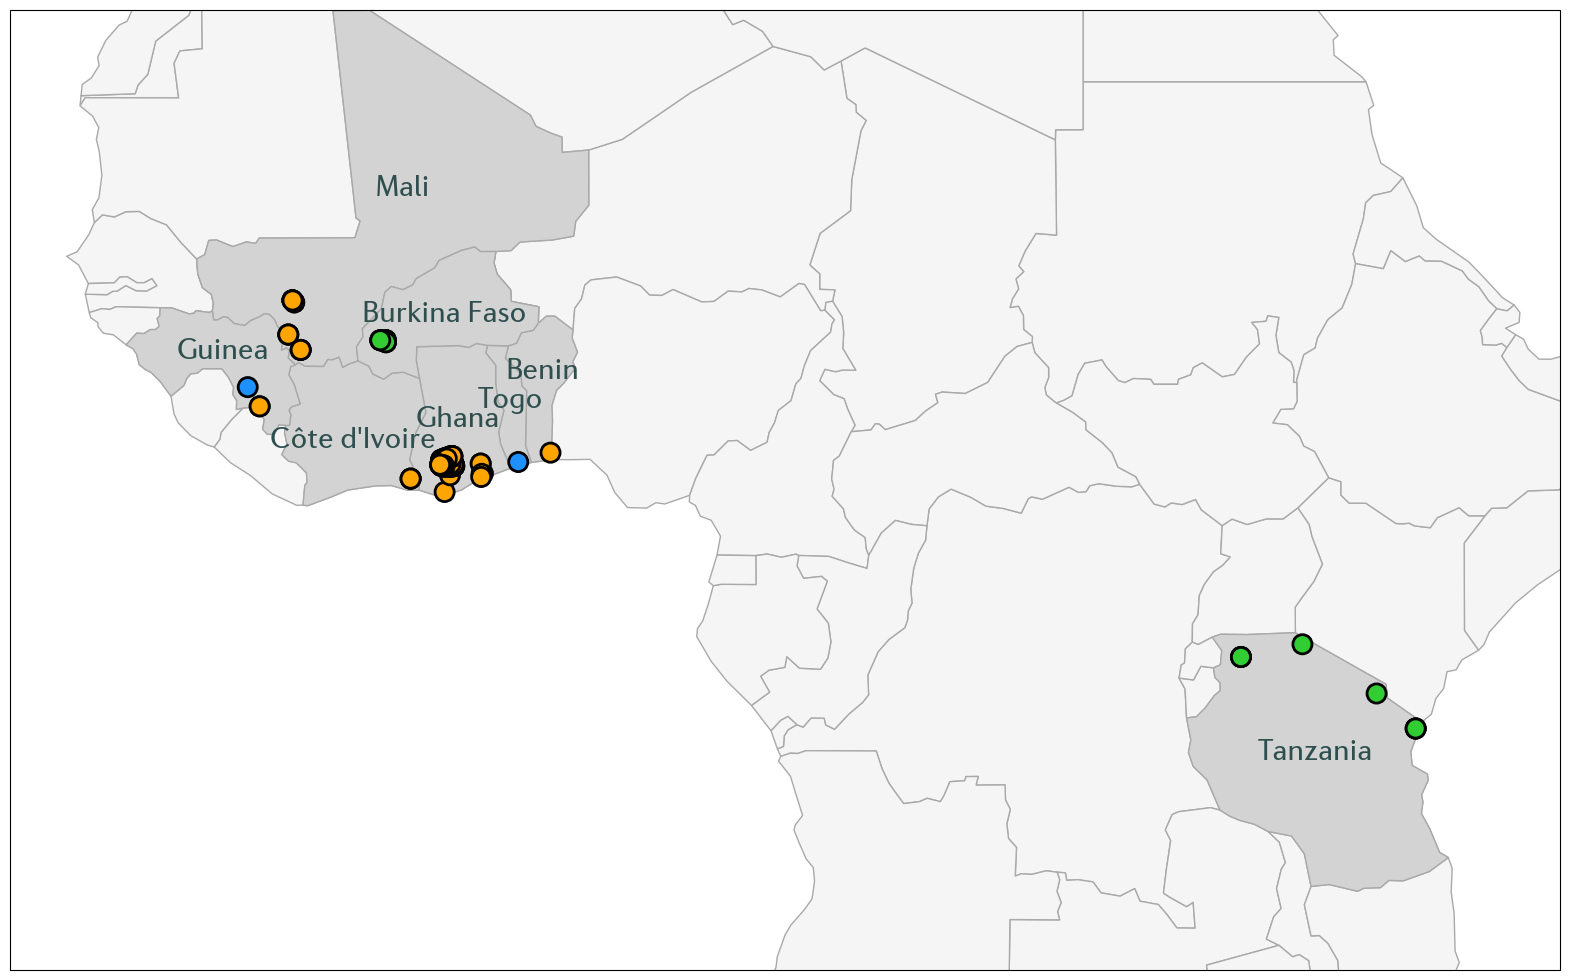

In [30]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df = pd.DataFrame({'name':countries, 'value':'lightgrey'})

map_df = gpd.GeoDataFrame(world.query("continent == 'Africa'"))
map_df = map_df.to_crs('EPSG:4326')
map_df_samples = map_df.merge(df.replace("Cote d'Ivoire", "Côte d'Ivoire"))

subplot_kw = dict(projection=ccrs.PlateCarree())
# figsize here is the entire figure size in inches, reduced later by bbox_inches
# This dpi setting affects the display size of the figure in the notebook
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)
#world[world.continent == 'Africa'].plot(ax=ax, color='grey', edgecolor='grey')
map_df.plot(ax=ax, color="whitesmoke", legend=True,  legend_kwds={'shrink': 0.45}, alpha=1, linewidth=1, edgecolor='darkgrey')
map_df_samples.plot(ax=ax, color=map_df_samples.value, legend=True,  legend_kwds={'shrink': 0.45}, alpha=1, linewidth=1, edgecolor='darkgrey')

for i, row in map_df_samples.iterrows():
    coords = list(row.geometry.centroid.coords[0])
    coords[1] += jitter_dict[row['name']] 
    ax.annotate(text=row['name'], xy=coords, ha='center', color='darkslategrey', size=22, weight='bold')

for i, row in df_samples[['longitude', 'latitude', 'taxon']].drop_duplicates().sort_values('taxon', ascending=False).iterrows():
    lat, long = row[['longitude', 'latitude']]
    tax = row['taxon']
    ax.add_patch(plt.Circle(xy=(lat, long), radius=0.4, facecolor=colour_dict[tax], edgecolor='k', zorder=8, lw=2))
    
ax.set_extent([-20, 45, -15, 25], crs=ccrs.PlateCarree())
#fig.savefig("../../results/coeae1f_sample_data_colu_top.png", dpi=200)

In [51]:
df_samples[['longitude', 'latitude', 'taxon']].drop_duplicates().sort_values('taxon', ascending=False)

,longitude,latitude,taxon
2062,-8.330,11.470,unassigned
1242,-3.200,5.467,unassigned
1947,-7.810,10.830,unassigned
2392,38.948,-4.940,gcx3
2131,31.621,-1.962,gcx3
...,...,...,...
2301,37.308,-3.482,arabiensis
2340,34.199,-1.431,arabiensis
1701,-4.235,11.151,arabiensis
1646,-4.472,11.233,arabiensis


In [44]:
df_samples[['cohort_admin2_year', 'taxon']].value_counts().to_frame().reset_index().sort_values('cohort_admin2_year')

,cohort_admin2_year,taxon,count
44,BF-09_Houet_arab_2014,arabiensis,3
8,BF-09_Houet_colu_2012,coluzzii,82
15,BF-09_Houet_colu_2014,coluzzii,53
6,BF-09_Houet_gamb_2012,gambiae,99
17,BF-09_Houet_gamb_2014,gambiae,46
7,BJ-OU_Avrankou_colu_2017,coluzzii,90
49,CI-CM_Sud-Comoe_colu_2017,coluzzii,1
20,CI-CM_Sud-Comoe_gamb_2017,gambiae,36
0,GH-AA_Ablekuma-Central-Municipal_colu_2018,coluzzii,268
32,GH-AA_Ga-East_colu_2012,coluzzii,14
